In [1]:
from dask_gateway import Gateway
import dask
import distributed

# dask.config.set({'distributed.nanny.environ.MALLOC_TRIM_THRESHOLD_': 65536})
print(dask.config.get('distributed.nanny.environ'))


gateway = Gateway()
options = gateway.cluster_options()
options
# cluster = dask_gateway.GatewayCluster()
# cluster
# client = cluster.get_client()
# cluster.scale(2)
# print(cluster.dashboard_link)

{}


Options<image='registry.eofactory.ai:5000/dhub/pangeo-vscode:1.1.0',
        worker_cores=2,
        worker_memory=4.0,
        gpu=False>


In [3]:
# cluster = gateway.connect(gateway.list_clusters()[0].name)
cluster = gateway.new_cluster(options)
cluster

In [1]:
from dask_gateway import Gateway
gateway = Gateway()
gateway.list_clusters()

[]

In [62]:
cluster.shutdown()

In [4]:
client = cluster.get_client()
client

<Client: 'tls://10.1.75.21:8786' processes=0 threads=0, memory=0 B>

In [22]:
client.cancel(data)

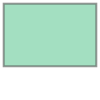

In [34]:
aoi.geometry[0]

In [11]:
import pystac_client
date1 = ['2023-05','2024-02']
api = pystac_client.Client.open("https://stactest.eofactory.ai")
# aoi1 = {'type': 'Polygon',
#   'coordinates': [[[74.82906949331458, 12.111433273810787],
#     [74.8372377351202, 11.650734876397012],
#     [75.42675047554229, 11.649644118577267],
#     [75.43677179136672, 12.110135839830196],
#     [74.82906949331458, 12.111433273810 787]]]}

search_2023 = api.search(
    datetime=date1,
    collections=["sentinel-1-rtc-thailand"],
    # intersects=aoi.geometry[0],
    # filter_lang="cql2-json",
    # filter={
    #   "op": "and",
    #   "args": [
    #     # {"op": "=", "args": [{"property": "collection"}, "sentinel-1-rtc"]},
    #     # {"op": "=", "args": [{"property": "sat:orbit_state"}, "descending"]},
    #     # {"op": "=", "args": [{"property": "sat:relative_orbit"}, "63"]}
    #   ]}
    # max_items=27
)

In [13]:
items_2023 = search_2023.get_all_items_as_dict()["features"]
print("2023:", len(items_2023), "items")

# data_06 = stac_vrt.build_vrt(
#     items_06, block_width=512, block_height=512, data_type="Byte"
# )
# vrt10 =  stac_vrt.build_vrt(
#     items_10, block_width=512, block_height=512, data_type="Byte"

# geojson = {
#     "type": "FeatureCollection", 
#     "features": items_2023, 
#      "crs": { "type": "name", "properties": { "name": "urn:ogc:def:crs:OGC:1.3:CRS84" } }
# }

# )
# items_2023 = items_2023[1:]
for id, item in enumerate(items_2023):
    print(item['properties']['sat:relative_orbit'])
    print()

2023: 190 items
99

99

62

62

172

172

164

164

99

99

62

62

172

172

164

164

99

99

62

62

172

172

164

164

99

99

62

62

172

172

164

164

99

99

62

62

172

172

164

164

99

99

62

62

172

172

164

164

99

99

62

62

172

172

164

164

99

99

62

62

172

172

164

164

99

99

62

62

172

172

164

164

99

99

62

62

172

172

164

164

99

99

62

62

172

172

164

164

99

99

62

62

172

172

164

164

99

99

62

62

172

172

164

164

99

99

62

62

172

172

164

164

99

99

62

62

172

172

164

164

99

99

62

62

172

172

164

164

99

99

62

62

172

172

164

164

62

62

164

164

62

62

164

164

99

99

62

62

172

172

164

164

62

62

172

172

164

164

99

99

62

62

172

172

164

164

99

99

62

62

172

172

164

164

99

99

62

62

172

172

164

164

99

99

62

62

172

172

164

164



In [14]:
import pandas as pd
df = pd.DataFrame(items_2023)
orbit_1 = df['properties'].apply(lambda x: x['sat:relative_orbit'] == 62)
orbit_2 = df['properties'].apply(lambda x: x['sat:relative_orbit'] == 99)
orbit_3 = df['properties'].apply(lambda x: x['sat:relative_orbit'] == 164)
orbit_4 = df['properties'].apply(lambda x: x['sat:relative_orbit'] == 172)
# df[df['properties']['sat:relative_orbit'] == 63]

In [16]:
items_group_by_orbit = [
                            df[orbit_1].to_dict('records'),
                            df[orbit_2].to_dict('records'),
                            df[orbit_3].to_dict('records'),
                            df[orbit_4].to_dict('records'),
                       ]

In [137]:
items_group_by_orbit[0]

[{'id': 'S1A_IW_GRDH_1SDV_20231125T002305_20231125T002331_051366_0632CE_BD93_Sigma_RTC_COG',
  'bbox': [80.93599236327015,
   15.349374725431714,
   83.5992348499069,
   17.32377392782333],
  'type': 'Feature',
  'links': [{'rel': 'collection',
    'type': 'application/json',
    'href': 'https://stactest.eofactory.ai/collections/sentinel-1-rtc'},
   {'rel': 'parent',
    'type': 'application/json',
    'href': 'https://stactest.eofactory.ai/collections/sentinel-1-rtc'},
   {'rel': 'root',
    'type': 'application/json',
    'href': 'https://stactest.eofactory.ai/'},
   {'rel': 'self',
    'type': 'application/geo+json',
    'href': 'https://stactest.eofactory.ai/collections/sentinel-1-rtc/items/S1A_IW_GRDH_1SDV_20231125T002305_20231125T002331_051366_0632CE_BD93_Sigma_RTC_COG'}],
  'assets': {'vh': {'href': 'https://data.skymapglobal.vn/sentinel-s1-rtc-cogs/S1A_IW_GRDH_1SDV_20231125T002305_20231125T002331_051366_0632CE_BD93_Sigma_RTC_COG/VH.tif',
    'type': 'image/tiff; application=ge

In [47]:
features = geojson['features']
features.append({
    "type": "Feature", 
    "properties": {}, 
    "geometry": items_2023[0]['geometry']
})

In [106]:
items_2023[0]['properties']['sat:relative_orbit']

63

In [97]:
import datetime
import re

time_str_1 = re.split('[A-Z]', items_2023[1]['properties']['datetime'])[1]
time_str_2 = re.split('[A-Z]', items_2023[0]['properties']['datetime'])[1]
time_1 = datetime.datetime.strptime(time_str_1, '%H:%M:%S')
time_2 = datetime.datetime.strptime(time_str_2, '%H:%M:%S')
(time_1 - time_2).total_seconds()

-25.0

In [152]:
from collections import defaultdict

orbits = defaultdict(list)
# items_len = len(items_2023)
# orbit_groups[0].append(items_2023[0]['id'])
group_id = 0
for orbit in items_group_by_orbit:
    items_len = len(orbit)
    orbit_groups = defaultdict(list)
    for i in range(items_len - 1):
        if i > 0 and abs((datetime.datetime.strptime(re.split('[A-Z]', orbit[i]['properties']['datetime'])[1], '%H:%M:%S') \
                - datetime.datetime.strptime(re.split('[A-Z]', orbit[0]['properties']['datetime'])[1], '%H:%M:%S')).total_seconds()) < 10:
            break
        orbit_groups[group_id].append(orbit[i])
        for j in range(i+1, items_len):
            if abs((datetime.datetime.strptime(re.split('[A-Z]', orbit[i]['properties']['datetime'])[1], '%H:%M:%S') \
                    - datetime.datetime.strptime(re.split('[A-Z]', orbit[j]['properties']['datetime'])[1], '%H:%M:%S')).total_seconds()) < 10:
                orbit_groups[group_id].append(orbit[j])
    
        group_id += 1
    group_id = 0
    orbits[f'relative_orbit_{orbit[0]["properties"]["sat:relative_orbit"]}'] = dict(orbit_groups)

# orbit_groups

In [150]:
orbits

defaultdict(list,
            {'relative_orbit_19': {0: ['S1A_IW_GRDH_1SDV_20231125T002305_20231125T002331_051366_0632CE_BD93_Sigma_RTC_COG',
               {'id': 'S1A_IW_GRDH_1SDV_20231113T002306_20231113T002331_051191_062CC4_401B_Sigma_RTC_COG',
                'bbox': [80.93357006459252,
                 15.349012379449245,
                 83.59678925238329,
                 17.32371535062705],
                'type': 'Feature',
                'links': [{'rel': 'collection',
                  'type': 'application/json',
                  'href': 'https://stactest.eofactory.ai/collections/sentinel-1-rtc'},
                 {'rel': 'parent',
                  'type': 'application/json',
                  'href': 'https://stactest.eofactory.ai/collections/sentinel-1-rtc'},
                 {'rel': 'root',
                  'type': 'application/json',
                  'href': 'https://stactest.eofactory.ai/'},
                 {'rel': 'self',
                  'type': 'application/g

In [59]:
import json
with open('box.geojson', 'w') as f:
    json.dump(geojson, f)

2023-12-28 05:20:03,235 - distributed.client - ERROR - Failed to reconnect to scheduler after 30.00 seconds, closing client
Exception in callback None()
handle: <Handle cancelled>
Traceback (most recent call last):
  File "/srv/conda/envs/notebook/lib/python3.11/site-packages/tornado/iostream.py", line 1367, in _do_ssl_handshake
    self.socket.do_handshake()
  File "/srv/conda/envs/notebook/lib/python3.11/ssl.py", line 1379, in do_handshake
    self._sslobj.do_handshake()
ssl.SSLEOFError: [SSL: UNEXPECTED_EOF_WHILE_READING] EOF occurred in violation of protocol (_ssl.c:1006)

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/srv/conda/envs/notebook/lib/python3.11/asyncio/events.py", line 80, in _run
    self._context.run(self._callback, *self._args)
  File "/srv/conda/envs/notebook/lib/python3.11/site-packages/tornado/platform/asyncio.py", line 192, in _handle_events
    handler_func(fileobj, events)
  File "/srv/conda/env

In [153]:
import json
with open('items_group_by_orbit.json', 'w') as f:
    json.dump(dict(orbits), f)

In [25]:
#Search images
from pystac_client import Client
# import planetary_computer as pc

# # Search against the Planetary Computer STAC API
# catalog = Client.open(
#   "https://planetarycomputer.microsoft.com/api/stac/v1"
# )

# # Define your temporal range
# daterange = {"interval": ["2022-11-01T00:00:00Z", "2023-09-15T00:00:00Z"]}

# # Define your search with CQL2 syntax
# search = catalog.search(
#     intersects=aoi,
#     datetime="2022-11-01/2023-09-15",
#     filter_lang="cql2-json",
#     filter={
#       "op": "and",
#       "args": [
#         {"op": "=", "args": [{"property": "collection"}, "sentinel-1-rtc"]},
#         # {"op": "=", "args": [{"property": "sat:orbit_state"}, "descending"]},
#         {"op": "=", "args": [{"property": "sat:relative_orbit"}, "165"]}
#       ]}
# )
items=search_2023.item_collection()
print("Number of items: {}".format(len(items)))
epsg=items[0].properties['proj:epsg']
items[0]
# #get crs
# print("epsg: {}".format(epsg))

Number of items: 27


<Item id=S1A_IW_GRDH_1SDV_20231130T003046_20231130T003111_051439_06353D_3B4B_Sigma_RTC_COG>

In [26]:
#Data
import numpy as np
import stackstac
import rioxarray

# signed_items = [pc.sign(item).to_dict() for item in items]
# dict_items = [item.to_dict() for item in items]
data = stackstac.stack(
        items,
        bounds_latlon=bbox,
        dtype='float32',
        assets=["vh"],  # vh only
        chunksize=4096,
        resolution=10,
        epsg=32644
    ).where(lambda x: x > -32768, other=np.nan)  # sentinel-1-rtc uses -32768 as nodata
    # .assign_coords(band=lambda x: x.common_name.rename("band"))  # use common names

data

/srv/conda/envs/notebook/lib/python3.11/site-packages/stackstac/prepare.py:364: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  times = pd.to_datetime(


<xarray.DataArray 'stackstac-485d0a384b4b9231f26eddda91da7c2a' (time: 27,
                                                                band: 1,
                                                                y: 394, x: 614)>
dask.array<where, shape=(27, 1, 394, 614), dtype=float32, chunksize=(1, 1, 394, 614), chunktype=numpy.ndarray>
Coordinates: (12/24)
  * time                 (time) datetime64[ns] 2023-06-27T00:30:42 ... 2023-1...
    id                   (time) <U81 'S1A_IW_GRDH_1SDV_20230627T003042_202306...
  * band                 (band) <U2 'vh'
  * x                    (x) float64 3.316e+05 3.316e+05 ... 3.377e+05 3.377e+05
  * y                    (y) float64 2.041e+06 2.041e+06 ... 2.037e+06 2.037e+06
    sat:orbit_state      <U10 'descending'
    ...                   ...
    instruments          <U3 'msi'
    proj:epsg            int64 32644
    raster:bands         object {'nodata': -32768, 'data_type': 'float32', 's...
    description          <U173 'Terrain-corrected gamma naught values of sign...
    title                <U41 'VH: vertical transmit, horizontal receive'
    epsg                 int64 32644
Attributes:
    spec:        RasterSpec(epsg=32644, bounds=(331550, 2037300, 337690, 2041...
    crs:         epsg:32644
    transform:   | 10.00, 0.00, 331550.00|\n| 0.00,-10.00, 2041240.00|\n| 0.0...
    resolution:  10